
#Stock Duration to come back from Crisis 



In [ ]:
#Import neccesary libraries & packages


In [41]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib
from matplotlib import pyplot as plt #can also be written as " import matplotlib.pyplot as plt "
from pandas.plotting import register_matplotlib_converters #to register pandas converters and formatters with matplotlib 
#^why didn't it work with from pd.plotting and only works with pandas.plotting ?
#^more about what we imported is given here https://stackoverflow.com/questions/61443261/what-is-the-use-of-pd-plotting-register-matplotlib-converters-in-pandas
from pandas.tseries.offsets import DateOffset
print(plt.style.available)
plt.style.use('seaborn') #Using a specific matplotlib style
from dateutil.relativedelta import relativedelta
#timedelta is used for time manipulation

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#Parameters


**Stock**

The company's stock to be studied, 
this variable should be set with official market "Ticker" of the company.
Ex - 'AAPL' is ticker for Apple





In [42]:
stock = 'BA' #Stcok under study, Boeing in our case
stock_name = 'Boeing'

**Period**

Period of time under study.

For example, we can have 5 years or say 10 years of data to find crisis for our stock under our study

In [43]:
period = 'max' #could be 1y, 2y, 5y, 10y, ytd, max

**time_window**

The time window will be the moving time interval used to measure loss in stock's value. At each point in time, the loss will be calculated compared to the reference point dated at the beginning of that time window.

This way the loss thus calculated will be representative of loss over that rolling window.

In [44]:
time_window = 20 
#change will be calculated over a rolling time period of 20 OPEN trading days

**large_loss**

A stock will be considered to have a crisis if the loss it suffers over the time_window is larger than large_loss.




In [45]:
large_loss = -0.30 
#large loss (a percentage number: large_loss = -0.30 represents a loss of -30%)


#Implementation
**Get The Historical price data of stock for period under study**

We will use Yfinance to download historical stock data and store it in a pandas dataframe format.



In [46]:
df = yf.download(tickers = stock, period = period, interval= '1d') #Download the data
df.drop(columns = ['Open', 'High', 'Low' , 'Adj Close', 'Volume'], inplace=True) #Drop unneccesary columns
df.insert(0, 'Company', stock_name) #Insert a new column at location 0 with heading Company and value = stock_name in it
df.head() #Display first 5 rows of data

[*********************100%***********************]  1 of 1 completed


,Company,Close
Date,,
1962-01-02,Boeing,0.823045
1962-01-03,Boeing,0.839506
1962-01-04,Boeing,0.831276
1962-01-05,Boeing,0.814815
1962-01-08,Boeing,0.816872


**Calculate change over the rolling time period**

We create a column to store the reference price at the beginning of time_window.

In [47]:
df['Reference Price'] = df.Close.shift(time_window)  
#We created a reference price which is the close price, 20 days earlier, each time shifted by 20 open trading days.
df

,Company,Close,Reference Price
Date,,,
1962-01-02,Boeing,0.823045,NaN
1962-01-03,Boeing,0.839506,NaN
1962-01-04,Boeing,0.831276,NaN
1962-01-05,Boeing,0.814815,NaN
1962-01-08,Boeing,0.816872,NaN
...,...,...,...
2020-08-20,Boeing,169.580002,176.449997
2020-08-21,Boeing,167.500000,173.759995
2020-08-24,Boeing,178.270004,170.210007


At the beginning of data there is no reference price, hence missing values as we didn't have data before that point

So we will replace missing values with oldest price available, the first historical price point available in data.

In [48]:
df.fillna(value = df.iloc[0]['Close'], inplace = True)
#Understand inplace = True from the link below,
#https://medium.com/@jman4190/explaining-the-inplace-parameter-for-beginners-5de7ffa18d2e#:~:text=When%20inplace%20%3D%20True%20%2C%20the%20data,to%20save%20it%20to%20something.
df

,Company,Close,Reference Price
Date,,,
1962-01-02,Boeing,0.823045,0.823045
1962-01-03,Boeing,0.839506,0.823045
1962-01-04,Boeing,0.831276,0.823045
1962-01-05,Boeing,0.814815,0.823045
1962-01-08,Boeing,0.816872,0.823045
...,...,...,...
2020-08-20,Boeing,169.580002,176.449997
2020-08-21,Boeing,167.500000,173.759995
2020-08-24,Boeing,178.270004,170.210007


**Now, we calculate a 'change' column: last 'Close' compared to 'Reference Price'. (the reference being the price of the stock at the start of time_window) . Reference Price was 'Close' observed 20 days ago.**

In [49]:
df['Change'] = (df['Close'] - df['Reference Price']) / df['Reference Price']
df

,Company,Close,Reference Price,Change
Date,,,,
1962-01-02,Boeing,0.823045,0.823045,0.000000
1962-01-03,Boeing,0.839506,0.823045,0.020000
1962-01-04,Boeing,0.831276,0.823045,0.010000
1962-01-05,Boeing,0.814815,0.823045,-0.010000
1962-01-08,Boeing,0.816872,0.823045,-0.007500
...,...,...,...,...
2020-08-20,Boeing,169.580002,176.449997,-0.038935
2020-08-21,Boeing,167.500000,173.759995,-0.036027
2020-08-24,Boeing,178.270004,170.210007,0.047353


#Find the worst crisis
To find the worst crisis, we will search for local minimums in the 'Change' column. i.e. smallest changes in Change column,

And then find out of those 'Change' local minimums the ones that are inferior to our large_loss parameter.
So, we will look for Boeing's worst crisis where stock fell more than 30%

In [10]:
#Creating a column of local minimums ( where a change is smaller than the one before and after )

In [50]:
df['Local Min'] = df.Change[ (df.Change.shift(1)>df.Change) & (df.Change.shift(-1)>df.Change) ]
df
#Here we don't need inPlace= True as we are making changes to df. If we weren't changing df and wanted to confirm them, we would have used inPlace.

,Company,Close,Reference Price,Change,Local Min
Date,,,,,
1962-01-02,Boeing,0.823045,0.823045,0.000000,NaN
1962-01-03,Boeing,0.839506,0.823045,0.020000,NaN
1962-01-04,Boeing,0.831276,0.823045,0.010000,NaN
1962-01-05,Boeing,0.814815,0.823045,-0.010000,-0.01000
1962-01-08,Boeing,0.816872,0.823045,-0.007500,NaN
...,...,...,...,...,...
2020-08-20,Boeing,169.580002,176.449997,-0.038935,NaN
2020-08-21,Boeing,167.500000,173.759995,-0.036027,NaN
2020-08-24,Boeing,178.270004,170.210007,0.047353,NaN


The very last change could be a minimum as well, as we don't have a price following it. So, if the change at the last day is smaller than one day before, consider it to be a local minimum as well.

In [51]:
if df.loc[df.index[-1], 'Change'] < df.loc[df.index[-2], 'Change']: #If last change is smaller than day before
  df.loc[df.index[-1], 'Local Min'] = df.loc[df.index[-1], 'Change'] #Count last change as local minimum

df

,Company,Close,Reference Price,Change,Local Min
Date,,,,,
1962-01-02,Boeing,0.823045,0.823045,0.000000,NaN
1962-01-03,Boeing,0.839506,0.823045,0.020000,NaN
1962-01-04,Boeing,0.831276,0.823045,0.010000,NaN
1962-01-05,Boeing,0.814815,0.823045,-0.010000,-0.01000
1962-01-08,Boeing,0.816872,0.823045,-0.007500,NaN
...,...,...,...,...,...
2020-08-20,Boeing,169.580002,176.449997,-0.038935,NaN
2020-08-21,Boeing,167.500000,173.759995,-0.036027,NaN
2020-08-24,Boeing,178.270004,170.210007,0.047353,NaN


Find out the worst crisis by selecting the rows for which the Change has a Local Minimum inferior to the large_loss parameter defined at the top of the Notebook.

df1 will be a smaller copy of the whole df. It will hold only values where Local min is smaller than Large_Loss we defined earlier..

In [52]:
df1 = df[ df['Local Min'] < large_loss ].copy() #We made a copy of df, stored in df1 that has values only where Local min < Large loss
df1

,Company,Close,Reference Price,Change,Local Min
Date,,,,,
1970-02-05,Boeing,0.699588,1.020576,-0.314516,-0.314516
1973-12-03,Boeing,0.465021,0.666667,-0.302469,-0.302469
1973-12-05,Boeing,0.448560,0.658436,-0.318750,-0.318750
2001-09-18,Boeing,33.139999,55.889999,-0.407050,-0.407050
2001-09-20,Boeing,29.760000,55.130001,-0.460185,-0.460185
2001-09-26,Boeing,34.290001,52.299999,-0.344359,-0.344359
2001-10-01,Boeing,32.400002,53.060001,-0.389371,-0.389371
2008-10-10,Boeing,41.799999,63.299999,-0.339652,-0.339652
2009-03-02,Boeing,29.510000,42.310001,-0.302529,-0.302529


Here we notice multiple local minimums in the span of a time_window.
This could lead to redundancy so we will keep only one local minimum (largest loss endured) that had the lowest value in entire time span of a given time_window

The following function will use a time_cursor that will iteratively at the start of each time window get the local minimums and find the date with worst loss as being the representative of the crisis during that time_window.

In [53]:
def get_single_crisis_dates_per_time_window(df):
    '''
    DOCSTRING: #Document string, defined by triple quotes
    INPUT: A dataFrame with local minimum of Change, with possibly several local minimums per time_window.
    OUTPUT: List of dates corresponding to the worst data points (worst loss) within each time_window.
    The output is the final list of crisis dates for that Stock over the period under study.
    '''
    crisis_dates = [] #initiate a list that will contain crisis dates
    time_cursor = df.index[0] #initiate a time cursor that will move at the start of each time_window to consider 
    # print(f ' time_cursor initiated at: {time_cursor} ' )
    time_window_df = df.loc[time_cursor:time_cursor+DateOffset(months = 1)] #data within the time_window being pointed out by the cursor

    #Loop running as long as the cursor can be moved to a next time_window (i.e as long as the dates are moving forward)
    while True:
      # print('\n')
      # print( time_window_df )
      # get the date of the worst crisis during the time_window and append to the list of crisis dates
      crisis_dates.append( time_window_df['Change'].idxmin()) #This finds the min of value of change among the time_window_df dates' data
      # print(f'\nThe crisis dates so far are: {crisis_dates}')

    # Try to get the next row after that time_window, and place the time_cursor there
      try:
        next_row = df[ time_window_df.index[-1] : ].iloc[1] #try to get the next row after that time_window
        time_cursor = next_row.name #place the time_cursor at the date corresponding to next row
        #print(f 'Moving the time_cursor to the start of the next time window to consider: {time_cursor}')
        time_window_df = df.loc[time_cursor:time_cursor + DateOffset(months =1)] #update the data being pointed out by the time_cursor

      #If no next row, we can end the loop there
      except:
        break
     #print(f'There is not next date to which cursor can move, that is currently at {time_cursor}\n BREAK OUT OF THE LOOP)
    
    
    return crisis_dates  


In [54]:
stock_crisis_dates = get_single_crisis_dates_per_time_window(df1)

**Let us see the worst crisis dates now:**

In [55]:
stock_crisis_dates

[Timestamp('1970-02-05 00:00:00'),
 Timestamp('1973-12-05 00:00:00'),
 Timestamp('2001-09-20 00:00:00'),
 Timestamp('2008-10-10 00:00:00'),
 Timestamp('2009-03-02 00:00:00'),
 Timestamp('2020-03-20 00:00:00')]

**Data corresponding to these dates is:**

In [56]:
df1 = df1.loc[stock_crisis_dates] # limit df1 (target output of the Notebook) to worst crisis dates only
df1

,Company,Close,Reference Price,Change,Local Min
Date,,,,,
1970-02-05,Boeing,0.699588,1.020576,-0.314516,-0.314516
1973-12-05,Boeing,0.448560,0.658436,-0.318750,-0.318750
2001-09-20,Boeing,29.760000,55.130001,-0.460185,-0.460185
2008-10-10,Boeing,41.799999,63.299999,-0.339652,-0.339652
2009-03-02,Boeing,29.510000,42.310001,-0.302529,-0.302529
2020-03-20,Boeing,95.010002,330.380005,-0.712422,-0.712422


#Find the date by which the stock comes back to its initial price¶

For a given crisis, we are going to retrieve the date by which the stock came back to the reference price from which it has fallen.

In [57]:
for crisis_date in df1.index: #Iterating through crisis dates in df1, looking for first date when stock registered a higher price than the Reference Price
#It is possible that it never went higher than reference price, hence we use try.
  try:
    #We create a new column, 'got back by'
    df1.loc[crisis_date, 'got back by'] = df.loc[( df.index >  crisis_date ) &
                                                 (df.Close > df.loc[crisis_date, 'Reference Price'])].iloc[0].name.date()
  except: 
    print(f'Couldnt find any date when stock got back to its reference price for crisis dated: {crisis_date}' )
df1   

Couldnt find any date when stock got back to its reference price for crisis dated: 2020-03-20 00:00:00


,Company,Close,Reference Price,Change,Local Min,got back by
Date,,,,,,
1970-02-05,Boeing,0.699588,1.020576,-0.314516,-0.314516,1975-06-03
1973-12-05,Boeing,0.448560,0.658436,-0.318750,-0.318750,1974-08-22
2001-09-20,Boeing,29.760000,55.130001,-0.460185,-0.460185,2004-09-17
2008-10-10,Boeing,41.799999,63.299999,-0.339652,-0.339652,2010-02-19
2009-03-02,Boeing,29.510000,42.310001,-0.302529,-0.302529,2009-05-05
2020-03-20,Boeing,95.010002,330.380005,-0.712422,-0.712422,NaN


Let us calculate duration it took to come back to its initial price.

In [58]:
# transform the index in a series of dates and calculate duration for stock to come back from crisis
df1['Duration (years)'] = df1['got back by'] - pd.to_datetime(df1.index.to_series()).dt.date  
# Get the number of days of the duraction object and divide by 365 to get years
#df1['Duration (years)'] = df1['Duration (years)']/365

df1['Duration (years)'] = df1['Duration (years)'].apply(lambda x: x.days / 365)
#https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/#:~:text=We%20can%20use%20the%20apply,gets%20applied%20to%20each%20row.
df1

,Company,Close,Reference Price,Change,Local Min,got back by,Duration (years)
Date,,,,,,,
1970-02-05,Boeing,0.699588,1.020576,-0.314516,-0.314516,1975-06-03,5.326027
1973-12-05,Boeing,0.448560,0.658436,-0.318750,-0.318750,1974-08-22,0.712329
2001-09-20,Boeing,29.760000,55.130001,-0.460185,-0.460185,2004-09-17,2.994521
2008-10-10,Boeing,41.799999,63.299999,-0.339652,-0.339652,2010-02-19,1.361644
2009-03-02,Boeing,29.510000,42.310001,-0.302529,-0.302529,2009-05-05,0.175342
2020-03-20,Boeing,95.010002,330.380005,-0.712422,-0.712422,NaN,NaN


Lets develop Duration in exact number of years, months and days

In [59]:
for i in range(len(df1)-1):
    my_relative_delta = relativedelta( df1.loc[df1.index[i],'got back by'] , pd.to_datetime(df1.index.to_series()).dt.date[i] )
    #We create a new function that assigns at index i in df1 'got back by' and then performs a function on it.
    df1.loc[df1.index[i],'years'] = my_relative_delta.years
    df1.loc[df1.index[i],'months'] = my_relative_delta.months
    df1.loc[df1.index[i],'days'] = my_relative_delta.days
df1

,Company,Close,Reference Price,Change,Local Min,got back by,Duration (years),years,months,days
Date,,,,,,,,,,
1970-02-05,Boeing,0.699588,1.020576,-0.314516,-0.314516,1975-06-03,5.326027,5.0,3.0,29.0
1973-12-05,Boeing,0.448560,0.658436,-0.318750,-0.318750,1974-08-22,0.712329,0.0,8.0,17.0
2001-09-20,Boeing,29.760000,55.130001,-0.460185,-0.460185,2004-09-17,2.994521,2.0,11.0,28.0
2008-10-10,Boeing,41.799999,63.299999,-0.339652,-0.339652,2010-02-19,1.361644,1.0,4.0,9.0
2009-03-02,Boeing,29.510000,42.310001,-0.302529,-0.302529,2009-05-05,0.175342,0.0,2.0,3.0
2020-03-20,Boeing,95.010002,330.380005,-0.712422,-0.712422,NaN,NaN,NaN,NaN,NaN


In [60]:
# Rename columns to make it more readable
df1.rename(columns={'Close': 'Low', 'Reference Price':'from High', 'Duration (years)':'after (years)'}, inplace=True)
#Close becomes Low, Ref Price becomes 'from High' and so on, we also delete Local Min, and Company
# Drop unnecessary columns
df1.drop(columns=['Local Min','Company'],inplace=True)
# Rename the index to "Crisis" #Date will become Crisis now
df1.index.rename('Crisis',inplace=True)
df1

,Low,from High,Change,got back by,after (years),years,months,days
Crisis,,,,,,,,
1970-02-05,0.699588,1.020576,-0.314516,1975-06-03,5.326027,5.0,3.0,29.0
1973-12-05,0.448560,0.658436,-0.318750,1974-08-22,0.712329,0.0,8.0,17.0
2001-09-20,29.760000,55.130001,-0.460185,2004-09-17,2.994521,2.0,11.0,28.0
2008-10-10,41.799999,63.299999,-0.339652,2010-02-19,1.361644,1.0,4.0,9.0
2009-03-02,29.510000,42.310001,-0.302529,2009-05-05,0.175342,0.0,2.0,3.0
2020-03-20,95.010002,330.380005,-0.712422,NaN,NaN,NaN,NaN,NaN


#One can notice how corona crisis has not fully played out yet

In [61]:
# Formatting the numbers
df1.index = df1.index.strftime("%Y-%m-%d") # Replace the index by formatted strings Y-d-m
df1.style.format({'Low':'${:.2f}','from High':'${:.2f}','Change':'{:.2f}%','got back by':'{}','after (years)':'{:.2f}',
                  'years':'{:.0f}','months':'{:.0f}','days':'{:.0f}'},na_rep="-")\
        .bar(subset=['Change'],color='#E98888',align='mid')\
        .bar(subset=['after (years)'],color='#88ABE9',align='mid')\
        .set_caption(f"Company: {stock_name}")

#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
#On how to use df.style.format        

,Low,from High,Change,got back by,after (years),years,months,days
Crisis,,,,,,,,
1970-02-05,$0.70,$1.02,-0.31%,1975-06-03,5.33,5,3,29
1973-12-05,$0.45,$0.66,-0.32%,1974-08-22,0.71,0,8,17
2001-09-20,$29.76,$55.13,-0.46%,2004-09-17,2.99,2,11,28
2008-10-10,$41.80,$63.30,-0.34%,2010-02-19,1.36,1,4,9
2009-03-02,$29.51,$42.31,-0.30%,2009-05-05,0.18,0,2,3
2020-03-20,$95.01,$330.38,-0.71%,-,-,-,-,-


#Plot

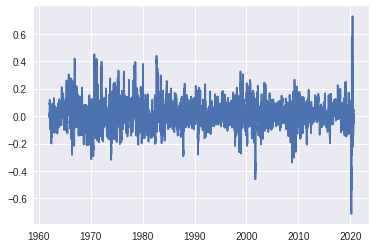

In [68]:
# Create a figure containing a single axes
fig, ax = plt.subplots()

# Draw on the axes
ax.plot(df.index.values,df['Change']) #On x axis index values i.e. dates, on y Change values

plt.show()